# Data Exploration: Land surface temperature in Baltimore

In [1]:
# import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# regression libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence

RANDOM_SEED = 3201

In [5]:
# import data
df = pd.read_csv('../../data/processed/grid/bal/2018-02-15/bal_data.csv')

# Describe

In [6]:
df.head()

,Unnamed: 0,x,y,cId,area,city,lst_day_mean_mean,lst_day_mean_max,lst_day_mean_min,lst_night_mean_mean,...,tree_min_sl,imp_mean_sl,imp_max_sl,imp_min_sl,therm_rad_day_mean_sl,therm_rad_day_max_sl,therm_rad_day_min_sl,therm_rad_night_mean_sl,therm_rad_night_max_sl,therm_rad_night_min_sl
0,g1,424996.178971,189212.211496,1,140184.769096,bal,43.673084,46.694080,32.353428,28.524205,...,21.0,22.100995,29.666667,21.0,9.956899,10.174779,9.706541,8.294518,8.390340,8.240544
1,g2,425496.178971,189212.211496,2,193761.065187,bal,43.192685,44.204056,32.694275,28.445516,...,21.0,22.519939,34.600000,21.0,9.903117,10.191422,9.639963,8.283910,8.359338,8.217494
2,g3,425996.178971,189212.211496,3,193668.023016,bal,43.242494,45.987240,32.818256,28.362636,...,21.0,23.290355,47.600000,21.0,9.842598,10.068256,9.544699,8.282700,8.349176,8.226443
3,g4,426496.178971,189212.211496,4,196080.635845,bal,44.598109,46.428665,31.894699,28.912349,...,21.0,24.288235,51.200000,21.0,9.746175,10.042675,9.458454,8.278716,8.328762,8.227140
4,g5,426996.178971,189212.211496,5,195121.646444,bal,41.946559,46.180618,30.512091,27.828888,...,21.0,23.811462,51.200000,21.0,9.785055,10.035610,9.494280,8.276913,8.329207,8.221004


In [7]:
names = df.columns.values
names

array(['Unnamed: 0', 'x', 'y', 'cId', 'area', 'city', 'lst_day_mean_mean',
       'lst_day_mean_max', 'lst_day_mean_min', 'lst_night_mean_mean',
       'lst_night_mean_max', 'lst_night_mean_min', 'alb_mean_mean',
       'alb_mean_max', 'alb_mean_min', 'ndvi_mean_mean', 'ndvi_mean_max',
       'ndvi_mean_min', 'lcov_11', 'lcov_21', 'lcov_22', 'lcov_23',
       'lcov_24', 'lcov_31', 'lcov_41', 'lcov_42', 'lcov_43', 'lcov_52',
       'lcov_71', 'lcov_90', 'lcov_95', 'tree_mean', 'tree_max',
       'tree_min', 'imp_mean', 'imp_max', 'imp_min', 'therm_rad_day_mean',
       'therm_rad_day_max', 'therm_rad_day_min', 'therm_rad_night_mean',
       'therm_rad_night_max', 'therm_rad_night_min',
       'lst_day_mean_mean_sl', 'lst_day_mean_max_sl',
       'lst_day_mean_min_sl', 'lst_night_mean_mean_sl',
       'lst_night_mean_max_sl', 'lst_night_mean_min_sl',
       'alb_mean_mean_sl', 'alb_mean_max_sl', 'alb_mean_min_sl',
       'ndvi_mean_mean_sl', 'ndvi_mean_max_sl', 'ndvi_mean_min_sl',
      

Remove the lat, long, name, cId columns and area == 0 rows

In [68]:
df = df.drop(['Unnamed: 0', 'x', 'y', 'cId'], axis = 1)

In [69]:
df = df[df['area'] > 0]

In [70]:
df.head()

,area,city,lst_day_mean_mean,lst_day_mean_max,lst_day_mean_min,lst_night_mean_mean,lst_night_mean_max,lst_night_mean_min,alb_mean_mean,alb_mean_max,...,lcov_52_sl,lcov_71_sl,lcov_90_sl,lcov_95_sl,tree_mean_sl,tree_max_sl,tree_min_sl,imp_mean_sl,imp_max_sl,imp_min_sl
0,140184.769096,bal,43.673084,46.694080,32.353428,28.524205,29.695961,20.076870,64.295159,105.435112,...,0.0,0.0,0.0,0.0,22.100995,29.666667,21.0,22.100995,29.666667,21.0
1,193761.065187,bal,43.192685,44.204056,32.694275,28.445516,29.424200,20.636292,62.910649,98.253441,...,0.0,0.0,0.0,0.0,22.519939,34.600000,21.0,22.519939,34.600000,21.0
2,193668.023016,bal,43.242494,45.987240,32.818256,28.362636,28.852781,20.449043,60.411285,76.379738,...,0.0,0.0,900.0,0.0,23.290355,47.600000,21.0,23.290355,47.600000,21.0
3,196080.635845,bal,44.598109,46.428665,31.894699,28.912349,29.624800,20.550053,63.863441,76.068939,...,0.0,0.0,900.0,0.0,24.288235,51.200000,21.0,24.288235,51.200000,21.0
4,195121.646444,bal,41.946559,46.180618,30.512091,27.828888,29.653679,20.544888,66.388940,130.441086,...,0.0,0.0,900.0,0.0,23.811462,51.200000,21.0,23.811462,51.200000,21.0


In [71]:
df.describe()

,area,lst_day_mean_mean,lst_day_mean_max,lst_day_mean_min,lst_night_mean_mean,lst_night_mean_max,lst_night_mean_min,alb_mean_mean,alb_mean_max,alb_mean_min,...,lcov_52_sl,lcov_71_sl,lcov_90_sl,lcov_95_sl,tree_mean_sl,tree_max_sl,tree_min_sl,imp_mean_sl,imp_max_sl,imp_min_sl
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,...,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,237452.729505,40.594168,44.937961,33.925752,28.491606,30.592737,24.085669,66.819740,113.461945,52.013078,...,187.783865,31.307271,896.825199,203.015438,22.770981,35.942090,19.101693,22.770981,35.942090,19.101693
std,39405.491172,6.392501,5.887214,7.572687,2.363559,2.257531,4.200890,10.723316,42.530943,4.518625,...,552.755757,217.989552,2411.666200,889.623516,3.744735,12.948551,3.316368,3.744735,12.948551,3.316368
min,68.800679,21.994083,22.169661,20.267323,20.526812,22.603706,16.375092,46.354064,47.751480,43.286037,...,0.000000,0.000000,0.000000,0.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
25%,250000.000000,38.863116,44.060547,28.355366,27.724201,29.751903,20.443534,60.124175,82.327471,48.676377,...,0.000000,0.000000,0.000000,0.000000,22.248656,24.000000,18.500000,22.248656,24.000000,18.500000
50%,250000.000000,42.504368,46.015957,31.427662,29.170158,30.699022,21.712217,65.522999,103.598824,51.221678,...,0.000000,0.000000,0.000000,0.000000,23.183621,34.600000,21.000000,23.183621,34.600000,21.000000
75%,250000.000000,44.739677,47.964090,41.633850,30.046824,31.727345,28.694732,73.211499,135.370266,54.387836,...,0.000000,0.000000,675.000000,0.000000,23.996805,44.156250,21.000000,23.996805,44.156250,21.000000
max,250000.000000,49.261159,59.000202,47.617420,32.778806,35.316219,31.341824,131.949121,321.120544,82.325905,...,3825.000000,2880.000000,19350.000000,11137.500000,35.247513,84.125000,22.125000,35.247513,84.125000,22.125000


## Response

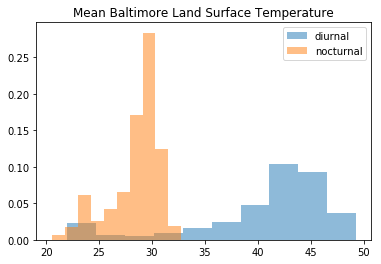

In [72]:
plt.hist(df['lst_day_mean_mean'], density = True, label = "diurnal", alpha = 0.5)
plt.hist(df['lst_night_mean_mean'], density = True, label = "nocturnal", alpha = 0.5)
plt.legend(loc='upper right')
plt.title("Mean Baltimore Land Surface Temperature")
plt.show()

In [73]:
lst_mean = df[['lst_day_mean_mean','lst_night_mean_mean', 'lst_day_mean_min', 'lst_day_mean_max', 'lst_night_mean_min', 'lst_night_mean_max']]
lst_vars = ['lst_day_mean_mean','lst_night_mean_mean', 'lst_day_mean_min', 'lst_day_mean_max', 'lst_night_mean_min', 'lst_night_mean_max']
lst_vars_sl = [var + '_sl' for var in lst_vars]
df = df.drop(lst_vars, axis=1)
df = df.drop(lst_vars_sl, axis=1)

# Divide into test and train

In [135]:
X_train, X_test, y_train, y_test = train_test_split(
    df, lst_mean, test_size=0.2, random_state=RANDOM_SEED)

## Scale the variables

In [136]:
X_train = X_train.drop('city', axis=1)
X_test = X_test.drop('city', axis=1)
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)
X_train = pd.DataFrame(data = X_scaled, columns = X_train.columns.values)
X_test = pd.DataFrame(data = scaler.transform(X_test), columns = X_test.columns.values)

In [137]:
# make a copy
train = pd.concat([y_train.copy(), X_train.copy()], axis=1)
train  = train.drop(['lst_day_mean_min', 'lst_day_mean_max', 'lst_night_mean_min', 'lst_night_mean_max'], axis=1)
train_nospatlag = train[train.columns[0:27]]
train.head()


,lst_day_mean_mean,lst_night_mean_mean,area,alb_mean_mean,alb_mean_max,alb_mean_min,ndvi_mean_mean,ndvi_mean_max,ndvi_mean_min,lcov_11,...,lcov_52_sl,lcov_71_sl,lcov_90_sl,lcov_95_sl,tree_mean_sl,tree_max_sl,tree_min_sl,imp_mean_sl,imp_max_sl,imp_min_sl
0,43.673084,28.524205,1.0,0.306778,0.265194,0.273542,0.478722,0.881426,0.313259,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.505015,0.235897,0.921348,0.505015,0.235897,0.921348
1,43.192685,28.445516,1.0,0.347080,0.464300,0.296826,0.548000,0.922141,0.276326,0.000000,...,0.000000,0.000000,0.139394,0.000000,0.524528,0.543590,0.910112,0.524528,0.543590,0.910112
2,NaN,NaN,1.0,0.160877,0.086748,0.170278,0.776228,0.910181,0.674863,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.513682,0.300855,0.898876,0.513682,0.300855,0.898876
3,44.598109,28.912349,1.0,0.160870,0.114122,0.103546,0.671450,0.902219,0.328883,0.000000,...,0.705882,0.368421,0.036364,0.000000,0.754357,0.596581,0.898876,0.754357,0.596581,0.898876
4,41.946559,27.828888,1.0,0.000000,0.000157,0.061378,0.042187,0.005560,0.069789,0.941176,...,0.000000,0.000000,0.218182,0.166667,0.105401,0.444444,0.000000,0.105401,0.444444,0.000000


In [138]:
train.columns.values

array(['lst_day_mean_mean', 'lst_night_mean_mean', 'area',
       'alb_mean_mean', 'alb_mean_max', 'alb_mean_min', 'ndvi_mean_mean',
       'ndvi_mean_max', 'ndvi_mean_min', 'lcov_11', 'lcov_21', 'lcov_22',
       'lcov_23', 'lcov_24', 'lcov_31', 'lcov_41', 'lcov_42', 'lcov_43',
       'lcov_52', 'lcov_71', 'lcov_90', 'lcov_95', 'tree_mean',
       'tree_max', 'tree_min', 'imp_mean', 'imp_max', 'imp_min',
       'alb_mean_mean_sl', 'alb_mean_max_sl', 'alb_mean_min_sl',
       'ndvi_mean_mean_sl', 'ndvi_mean_max_sl', 'ndvi_mean_min_sl',
       'lcov_11_sl', 'lcov_21_sl', 'lcov_22_sl', 'lcov_23_sl',
       'lcov_24_sl', 'lcov_31_sl', 'lcov_41_sl', 'lcov_42_sl',
       'lcov_43_sl', 'lcov_52_sl', 'lcov_71_sl', 'lcov_90_sl',
       'lcov_95_sl', 'tree_mean_sl', 'tree_max_sl', 'tree_min_sl',
       'imp_mean_sl', 'imp_max_sl', 'imp_min_sl'], dtype=object)

# Explore correlations

## Response

In [139]:
corr_matrix = lst_mean.corr()
corr_matrix

,lst_day_mean_mean,lst_night_mean_mean,lst_day_mean_min,lst_day_mean_max,lst_night_mean_min,lst_night_mean_max
lst_day_mean_mean,1.000000,0.913636,0.773661,0.835401,0.501761,0.486200
lst_night_mean_mean,0.913636,1.000000,0.708925,0.730762,0.558958,0.574555
lst_day_mean_min,0.773661,0.708925,1.000000,0.536890,0.893062,0.242335
lst_day_mean_max,0.835401,0.730762,0.536890,1.000000,0.262730,0.775314
lst_night_mean_min,0.501761,0.558958,0.893062,0.262730,1.000000,0.146022
lst_night_mean_max,0.486200,0.574555,0.242335,0.775314,0.146022,1.000000


## All

In [125]:
corr_matrix = train_nospatlag.corr()
corr_matrix

,lst_day_mean_mean,lst_night_mean_mean,area,alb_mean_mean,alb_mean_max,alb_mean_min,ndvi_mean_mean,ndvi_mean_max,ndvi_mean_min,lcov_11,...,lcov_43,lcov_52,lcov_71,lcov_90,lcov_95,tree_mean,tree_max,tree_min,imp_mean,imp_max
lst_day_mean_mean,1.000000,0.915343,0.028256,0.027300,0.024038,0.025349,-0.092290,-0.073231,-0.068108,0.054785,...,-0.035913,-0.003954,0.028495,0.028850,0.043013,-0.045635,-0.039675,-0.045124,-0.045635,-0.039675
lst_night_mean_mean,0.915343,1.000000,0.013170,0.021953,0.021939,0.005924,-0.076683,-0.057654,-0.055560,0.047983,...,-0.057428,0.003255,0.009841,0.044741,0.033805,-0.035923,-0.031712,-0.041904,-0.035923,-0.031712
area,0.028256,0.013170,1.000000,0.037890,0.020200,0.043931,-0.133364,-0.108089,-0.053445,0.086283,...,-0.019163,-0.017159,0.001904,-0.196705,-0.216612,-0.139137,-0.167337,-0.073887,-0.139137,-0.167337
alb_mean_mean,0.027300,0.021953,0.037890,1.000000,0.757823,0.708240,-0.219547,0.125402,-0.240060,-0.476994,...,-0.297510,-0.139766,-0.054031,-0.078729,-0.106549,0.152006,-0.180847,0.319245,0.152006,-0.180847
alb_mean_max,0.024038,0.021939,0.020200,0.757823,1.000000,0.365583,-0.218960,0.099572,-0.346839,-0.281387,...,-0.180050,-0.058396,-0.015973,-0.029436,-0.046934,0.119983,-0.079962,0.109039,0.119983,-0.079962
alb_mean_min,0.025349,0.005924,0.043931,0.708240,0.365583,1.000000,-0.085471,0.060289,-0.006706,-0.425960,...,-0.243839,-0.128228,-0.055602,-0.090414,-0.130028,0.120793,-0.264951,0.524184,0.120793,-0.264951
ndvi_mean_mean,-0.092290,-0.076683,-0.133364,-0.219547,-0.218960,-0.085471,1.000000,0.795514,0.816701,-0.704124,...,0.399108,0.190849,0.067716,0.113025,-0.039663,0.714769,0.444259,0.619612,0.714769,0.444259
ndvi_mean_max,-0.073231,-0.057654,-0.108089,0.125402,0.099572,0.060289,0.795514,1.000000,0.543447,-0.803517,...,0.224165,0.117511,0.042787,0.097518,0.041583,0.691870,0.440008,0.593045,0.691870,0.440008
ndvi_mean_min,-0.068108,-0.055560,-0.053445,-0.240060,-0.346839,-0.006706,0.816701,0.543447,1.000000,-0.538215,...,0.391450,0.160014,0.032840,0.013092,-0.130119,0.562704,0.274933,0.604660,0.562704,0.274933
lcov_11,0.054785,0.047983,0.086283,-0.476994,-0.281387,-0.425960,-0.704124,-0.803517,-0.538215,1.000000,...,-0.137307,-0.047479,-0.023337,-0.029538,0.097952,-0.757938,-0.237464,-0.782562,-0.757938,-0.237464


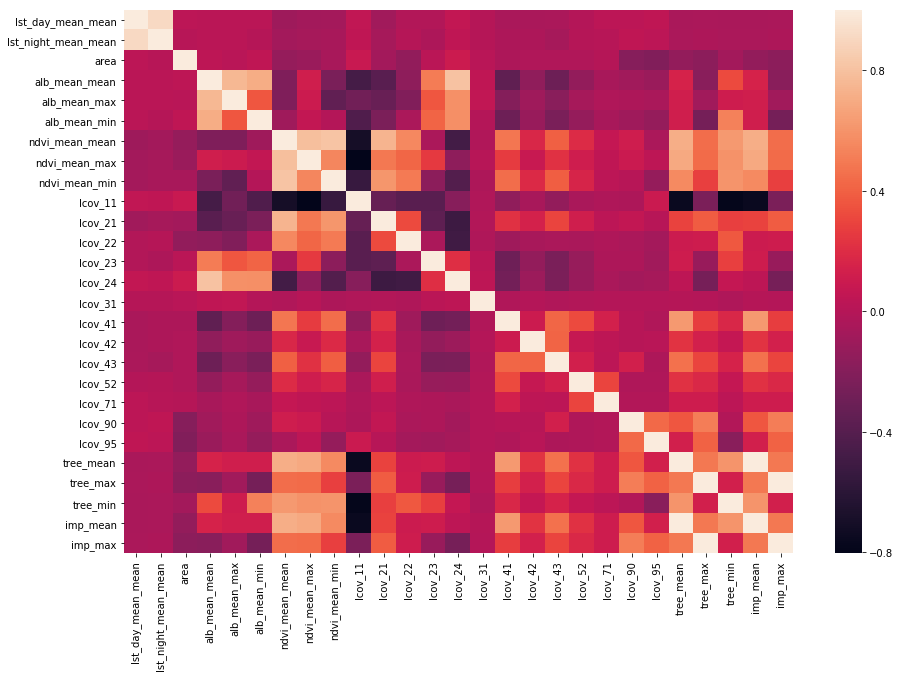

In [126]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns)

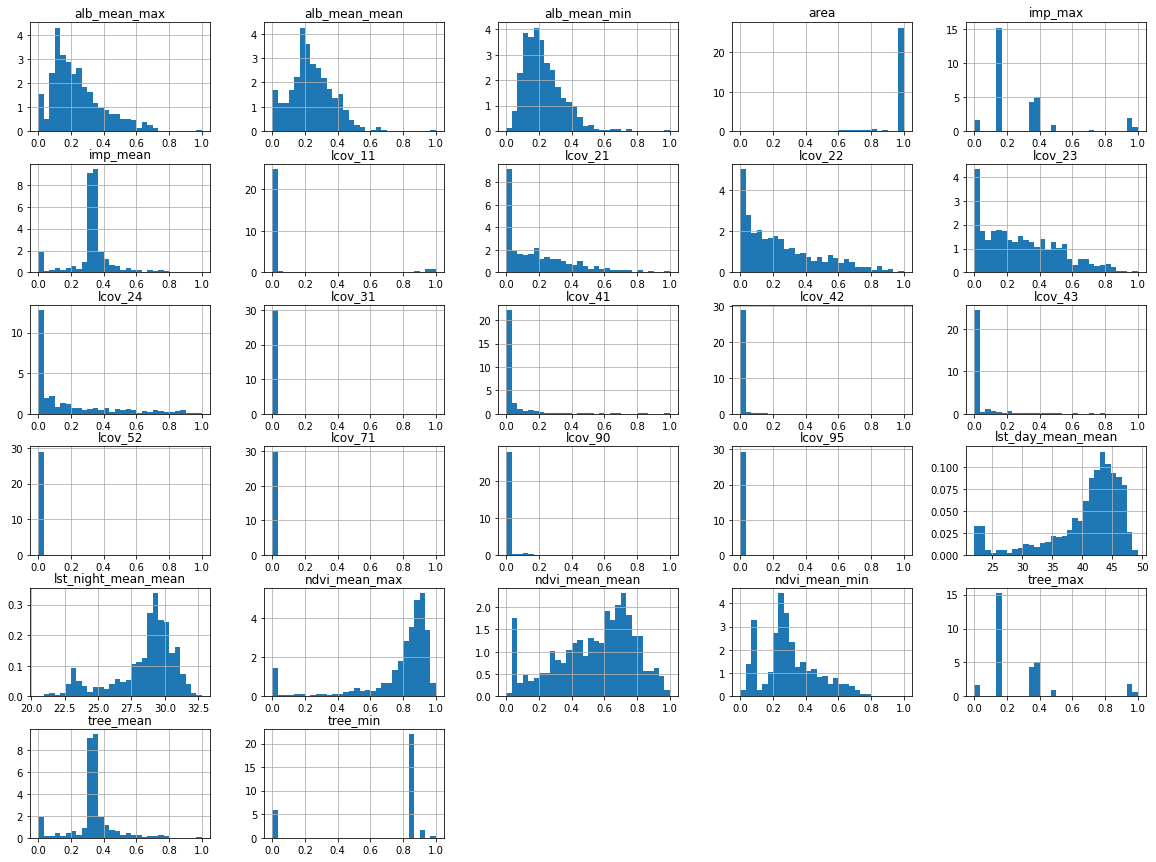

In [249]:
train_nospatlag.hist(bins = 30, figsize=(20,15), density = True)
plt.show()

# Scatter

In [128]:
# list the covariates
covariates = list(train_nospatlag.columns)

## Response

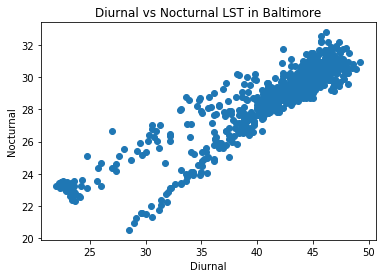

In [119]:
plt.scatter(train['lst_day_mean_mean'], train['lst_night_mean_mean'])
plt.title("Diurnal vs Nocturnal LST in Baltimore")
plt.xlabel('Diurnal')
plt.ylabel('Nocturnal')
plt.show()

## Response-covariate

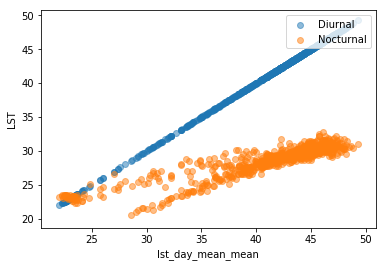

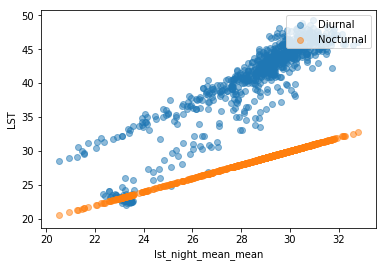

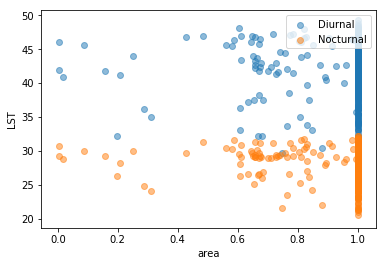

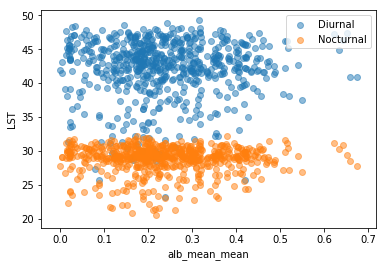

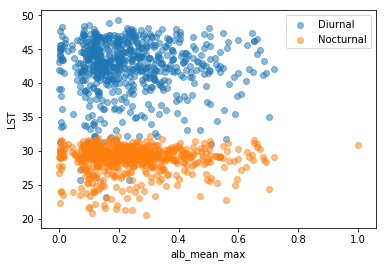

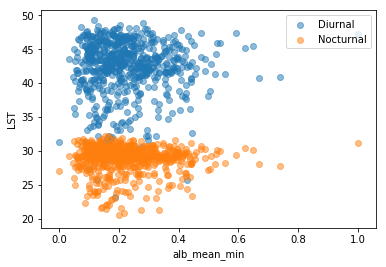

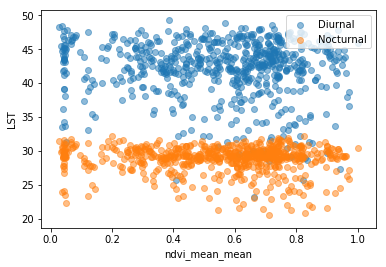

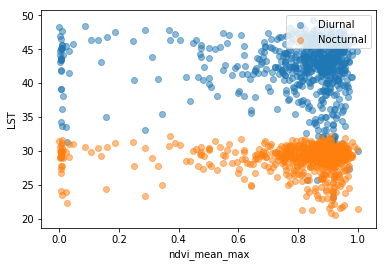

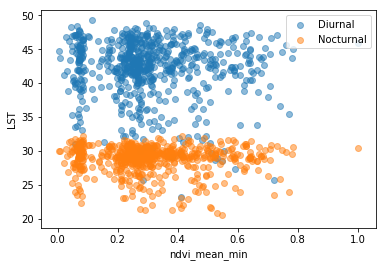

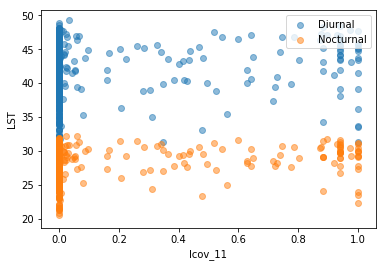

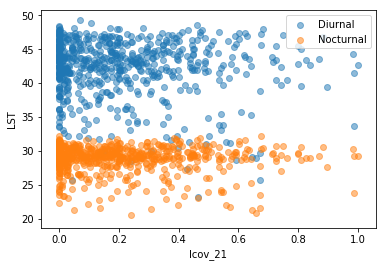

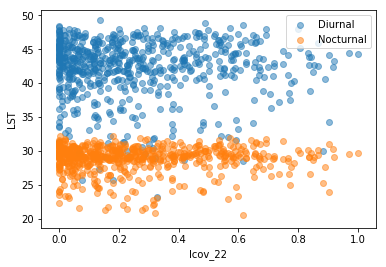

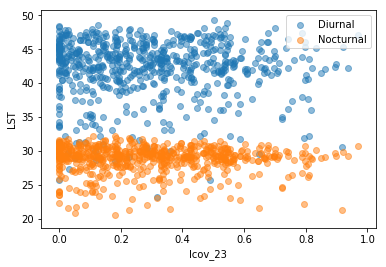

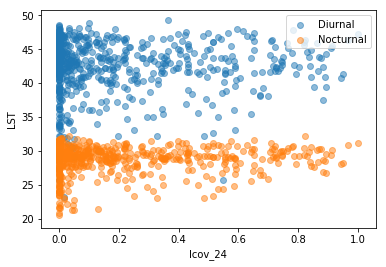

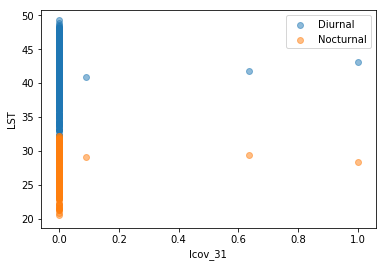

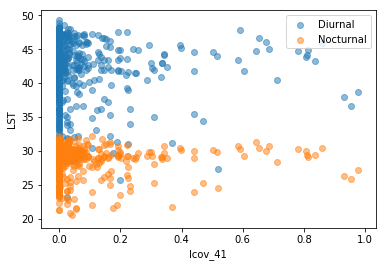

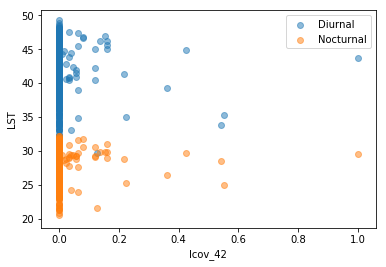

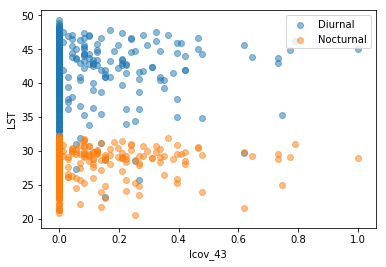

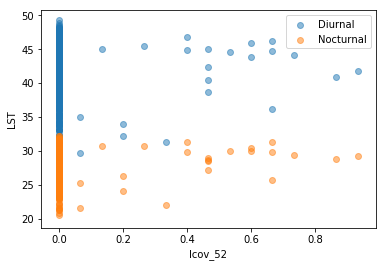

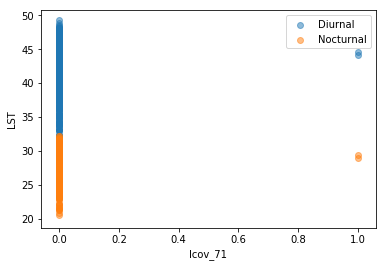

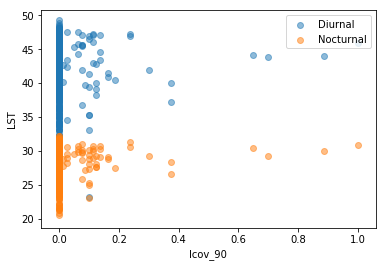

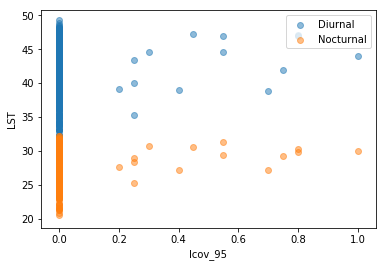

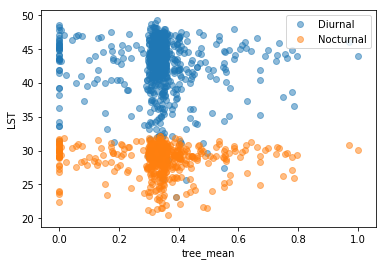

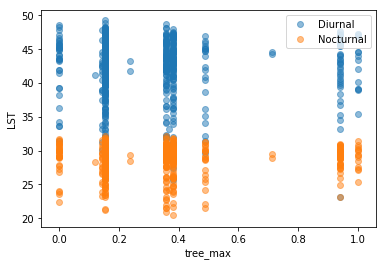

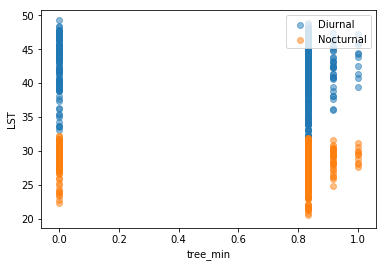

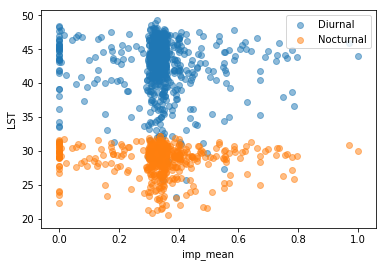

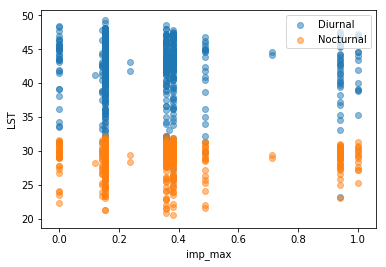

In [129]:

for covar in covariates:
    # plot each scatter
    plt.scatter(train[covar], train['lst_day_mean_mean'], label = 'Diurnal', alpha = 0.5)
    plt.scatter(train[covar], train['lst_night_mean_mean'], label = 'Nocturnal', alpha = 0.5)
    plt.xlabel(covar)
    plt.ylabel('LST')
    plt.legend(loc='upper right')
    plt.show()
    
# Note: lcov variables are defined here: https://www.mrlc.gov/nlcd11_leg.php

# Initial Regressions

Doing some initial regression fitting to see how the models look and what the most important variables are.

In [142]:
# X_train, lst_day_train, lst_night_train, X_test
lst_day_train = y_train['lst_day_mean_mean']
lst_night_train = y_train['lst_night_mean_mean']
# test
lst_day_test = y_test['lst_day_mean_mean']
lst_night_test = y_test['lst_night_mean_mean']

### Null

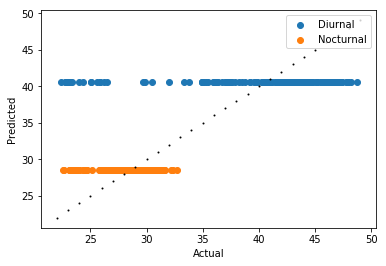

Nocturnal MAE: 1.7440930719592698
Diurnal MAE: 4.542351938786831


In [180]:
# train the model

# predict the model
null_predict_day = np.ones(len(lst_day_test)) * np.mean(lst_day_train)
null_predict_night = np.ones(len(lst_night_test)) * np.mean(lst_night_train)

# plot predict vs actual
plt.scatter(lst_day_test, null_predict_day, label = 'Diurnal')
plt.scatter(lst_night_test, null_predict_night, label = 'Nocturnal')
plt.scatter(x = np.arange(22,50), y = np.arange(22,50), color = 'k', linestyle='-', s=1 )
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.legend(loc='upper right')
plt.show()

# calculate the MAE
mae_day = np.mean(abs(null_predict_day - lst_day_test))
mae_night = np.mean(abs(null_predict_night - lst_night_test))
print('Nocturnal MAE: {}'.format(mae_night))
print('Diurnal MAE: {}'.format(mae_day))

### Random Forest

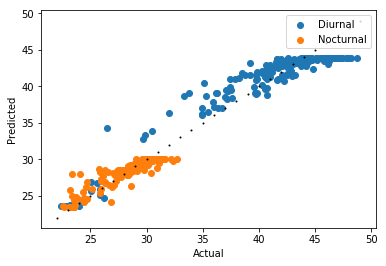

Nocturnal MAE: 0.6554898592437037
Diurnal MAE: 1.5079249667464112


In [183]:
# train the model
rf_day_reg = RandomForestRegressor(max_depth=2, random_state=RANDOM_SEED, n_estimators=500, max_features=1/3)
rf_night_reg = RandomForestRegressor(max_depth=2, random_state=RANDOM_SEED, n_estimators=500, max_features=1/3)
rf_day_reg.fit(X_train, lst_day_train)
rf_night_reg.fit(X_train, lst_night_train)

# predict the model
rf_predict_day = rf_day_reg.predict(X_test)
rf_predict_night = rf_night_reg.predict(X_test)

# plot predict vs actual
plt.scatter(lst_day_test, rf_predict_day, label = 'Diurnal')
plt.scatter(lst_night_test, rf_predict_night, label = 'Nocturnal')
plt.scatter(x = np.arange(22,50), y = np.arange(22,50), color = 'k', linestyle='-', s=1 )
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.legend(loc='upper right')
plt.show()

# calculate the MAE
mae_day = np.mean(abs(rf_predict_day - lst_day_test))
mae_night = np.mean(abs(rf_predict_night - lst_night_test))
print('Nocturnal MAE: {}'.format(mae_night))
print('Diurnal MAE: {}'.format(mae_day))

#### Variable importance

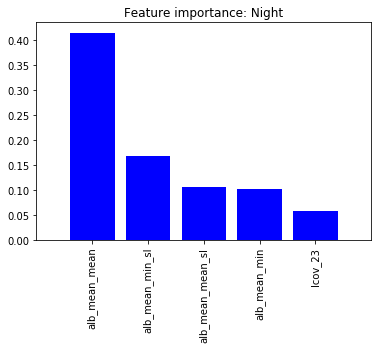

Feature ranking:
1. alb_mean_mean (0.41492466042452336)
2. alb_mean_min_sl (0.1673791571544787)
3. alb_mean_mean_sl (0.10509828222968796)
4. alb_mean_min (0.10293998376380036)
5. lcov_23 (0.05774103983692932)
6. tree_mean (0.02442278702666897)
7. lcov_24 (0.019590315357925627)
8. imp_mean (0.014867151157730837)
9. lcov_11 (0.014770745567819788)
10. lcov_41 (0.014155359294979906)
11. lcov_23_sl (0.012652471903626781)
12. alb_mean_max (0.011899554403856425)
13. lcov_22 (0.009656260894797724)
14. ndvi_mean_mean (0.007105564986476221)
15. lcov_24_sl (0.005621065310714373)
16. lcov_21 (0.005441134175214212)
17. ndvi_mean_min_sl (0.002975058158627428)
18. alb_mean_max_sl (0.0028424012651408655)
19. lcov_22_sl (0.001625863615407969)
20. imp_max (0.0008798827886391275)
21. tree_mean_sl (0.0008724578356011304)
22. ndvi_mean_mean_sl (0.0008580896574975971)
23. lcov_21_sl (0.0006953258730009444)
24. tree_max (0.0006042795802910287)
25. lcov_41_sl (0.00019002585378894888)
26. imp_min_sl (0.0001459

In [211]:
important_num = 5 # top five
importances = rf_night_reg.feature_importances_
covariates = X_train.columns

indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importance: Night")
plt.bar(range(important_num), importances[indices[0:important_num]],
       color="b", align="center")
plt.xticks(range(important_num), covariates[indices[0:important_num]], rotation=90)
plt.xlim([-1, important_num])
plt.show()

# Print the feature ranking
print("Feature ranking:")

for f in range(len(indices)): 
    print("{}. {} ({})".format(f + 1, covariates[indices[f]], importances[indices[f]]))



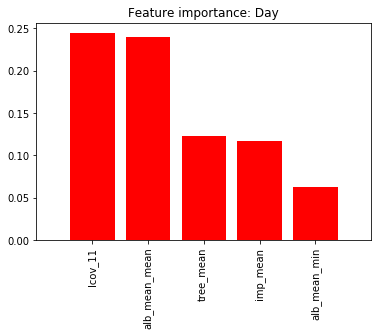

Feature ranking:
1. lcov_11 (0.24438303660134647)
2. alb_mean_mean (0.23999125372309915)
3. tree_mean (0.12286643328475207)
4. imp_mean (0.11715042237545878)
5. alb_mean_min (0.06313694049176691)
6. ndvi_mean_mean (0.0602276732830206)
7. alb_mean_min_sl (0.04204323835619843)
8. lcov_11_sl (0.01746082317528593)
9. lcov_41 (0.013633921305851945)
10. imp_min_sl (0.01302320948838216)
11. ndvi_mean_min_sl (0.013019875265710518)
12. tree_min_sl (0.01077979352087349)
13. tree_mean_sl (0.010184231897031212)
14. ndvi_mean_min (0.006086219353891635)
15. imp_mean_sl (0.0052884390243675035)
16. alb_mean_mean_sl (0.00512140743009077)
17. lcov_24 (0.004578264883646329)
18. lcov_23 (0.0035192034256810905)
19. ndvi_mean_mean_sl (0.0011810958456768448)
20. ndvi_mean_max_sl (0.0008753380577405317)
21. lcov_22 (0.0008476415959448928)
22. lcov_21 (0.0007444760815915707)
23. alb_mean_max (0.0007219454147625261)
24. tree_min (0.0006448076925838321)
25. lcov_21_sl (0.0005376589813268906)
26. lcov_41_sl (0.00

In [212]:
important_num = 5 # top five
importances = rf_day_reg.feature_importances_
covariates = X_train.columns

indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importance: Day")
plt.bar(range(important_num), importances[indices[0:important_num]],
       color="r", align="center")
plt.xticks(range(important_num), covariates[indices[0:important_num]], rotation=90)
plt.xlim([-1, important_num])
plt.show()

# Print the feature ranking
print("Feature ranking:")

for f in range(len(indices)): 
    print("{}. {} ({})".format(f + 1, covariates[indices[f]], importances[indices[f]]))



Note:
* lcov_11 is the area of water in the grid cell
* lcov_23 is the area of developed, medium intensity in the cell (single-family housing units)
* alb = albedo 
* tree = tree canopy
* imp = impervious surface
* the _mean / _min / _max are the mean, min, or max of measurements within the cell from the averaged satellite images
* _sl means the average of the surrounding cells (i.e. spatially lagged variable)



### Gradient Boosted Regression Trees

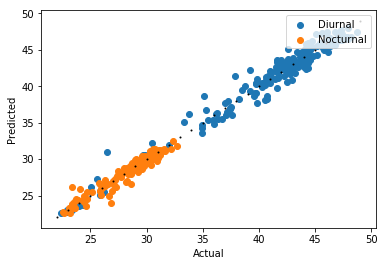

Nocturnal MAE: 0.4015800792000048
Diurnal MAE: 0.7951041414604203


In [219]:
# train the model
gbm_day_reg = GradientBoostingRegressor(max_depth=2, random_state=RANDOM_SEED, learning_rate=0.1, n_estimators=500, loss='ls')
gbm_night_reg = GradientBoostingRegressor(max_depth=2, random_state=RANDOM_SEED, learning_rate=0.1, n_estimators=500, loss='ls')
gbm_day_reg.fit(X_train, lst_day_train)
gbm_night_reg.fit(X_train, lst_night_train)

# predict the model
gbm_predict_day = gbm_day_reg.predict(X_test)
gbm_predict_night = gbm_night_reg.predict(X_test)

# plot predict vs actual
plt.scatter(lst_day_test, gbm_predict_day, label = 'Diurnal')
plt.scatter(lst_night_test, gbm_predict_night, label = 'Nocturnal')
plt.scatter(x = np.arange(22,50), y = np.arange(22,50), color = 'k', linestyle='-', s=1 )
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.legend(loc='upper right')
plt.show()

# calculate the MAE
mae_day = np.mean(abs(gbm_predict_day - lst_day_test))
mae_night = np.mean(abs(gbm_predict_night - lst_night_test))
print('Nocturnal MAE: {}'.format(mae_night))
print('Diurnal MAE: {}'.format(mae_day))

### Variable Importance

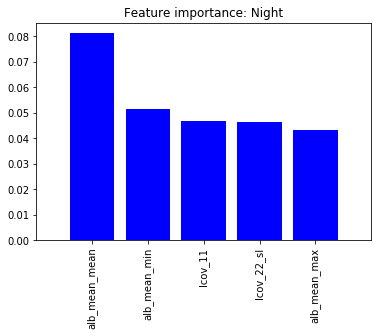

Feature ranking:
1. feature #1: alb_mean_mean (0.08128305681471674)
2. feature #3: alb_mean_min (0.05142488399067376)
3. feature #7: lcov_11 (0.046557491654122464)
4. feature #34: lcov_22_sl (0.0464375845948838)
5. feature #2: alb_mean_max (0.04304835580486254)
6. feature #31: ndvi_mean_min_sl (0.042913516128850325)
7. feature #29: ndvi_mean_mean_sl (0.034600936546925955)
8. feature #4: ndvi_mean_mean (0.034439077620787455)
9. feature #5: ndvi_mean_max (0.033506022709993664)
10. feature #20: tree_mean (0.03275330370847383)
11. feature #8: lcov_21 (0.031097976466216884)
12. feature #6: ndvi_mean_min (0.02983919717298871)
13. feature #26: alb_mean_mean_sl (0.0292926835972588)
14. feature #36: lcov_24_sl (0.028561534829001485)
15. feature #35: lcov_23_sl (0.027660659605386783)
16. feature #9: lcov_22 (0.02716636007769374)
17. feature #30: ndvi_mean_max_sl (0.026662979697739134)
18. feature #28: alb_mean_min_sl (0.026172066286741652)
19. feature #27: alb_mean_max_sl (0.02567592554735709)
2

In [225]:
important_num = 5 # top five
importances = gbm_night_reg.feature_importances_
covariates = X_train.columns

indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importance: Night")
plt.bar(range(important_num), importances[indices[0:important_num]],
       color="b", align="center")
plt.xticks(range(important_num), covariates[indices[0:important_num]], rotation=90)
plt.xlim([-1, important_num])
plt.show()

# Print the feature ranking
print("Feature ranking:")

for f in range(len(indices)): 
    print("{}. feature #{}: {} ({})".format(f + 1,indices[f], covariates[indices[f]], importances[indices[f]]))


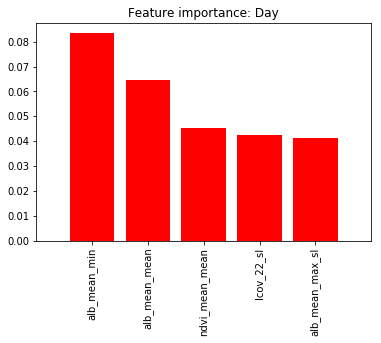

Feature ranking:
1. feature #3: alb_mean_min (0.08332187902979622)
2. feature #1: alb_mean_mean (0.06456629201104098)
3. feature #4: ndvi_mean_mean (0.04508458957642462)
4. feature #34: lcov_22_sl (0.04250363509983004)
5. feature #27: alb_mean_max_sl (0.041452630250614964)
6. feature #2: alb_mean_max (0.03984338772217237)
7. feature #31: ndvi_mean_min_sl (0.03831775334658596)
8. feature #36: lcov_24_sl (0.038083777650672675)
9. feature #28: alb_mean_min_sl (0.03773730308314913)
10. feature #11: lcov_24 (0.037214730692799666)
11. feature #5: ndvi_mean_max (0.03433517765510705)
12. feature #6: ndvi_mean_min (0.033481866616303486)
13. feature #26: alb_mean_mean_sl (0.033114980982134445)
14. feature #35: lcov_23_sl (0.03086317663520852)
15. feature #9: lcov_22 (0.028191886219790747)
16. feature #10: lcov_23 (0.026893100780911224)
17. feature #13: lcov_41 (0.026778572296594874)
18. feature #8: lcov_21 (0.025685485018561927)
19. feature #7: lcov_11 (0.021736577414240014)
20. feature #23: imp

In [226]:
important_num = 5 # top five
importances = gbm_day_reg.feature_importances_
covariates = X_train.columns

indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importance: Day")
plt.bar(range(important_num), importances[indices[0:important_num]],
       color="r", align="center")
plt.xticks(range(important_num), covariates[indices[0:important_num]], rotation=90)
plt.xlim([-1, important_num])
plt.show()

# Print the feature ranking
print("Feature ranking:")

for f in range(len(indices)): 
    print("{}. feature #{}: {} ({})".format(f + 1,indices[f], covariates[indices[f]], importances[indices[f]]))



Note:
* lcov_11 is the area of water in the grid cell
* lcov_22 is low-intensity development. usually 20-49% impervious surface, with single-family housing.

### Partial Dependence

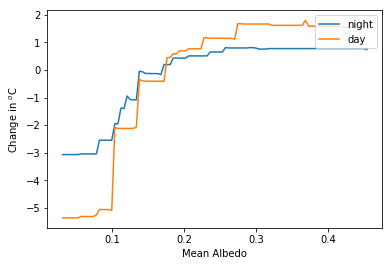

In [268]:
pdp_day = partial_dependence(gbm_day_reg, [1], X=X_train) 
pdp_night = partial_dependence(gbm_night_reg, [1], X=X_train) 
# plt.plot(pdp_day[0], pdp_day[1], pdp_night[0], pdp_night[1])
%matplotlib inline
plt.plot(pdp_night[1][0], pdp_night[0][0], label = 'night')
plt.plot(pdp_day[1][0], pdp_day[0][0], label = 'day')
plt.ylabel('Change in $^o$C')
plt.xlabel('Mean Albedo')
plt.legend(loc='upper right')
plt.show()

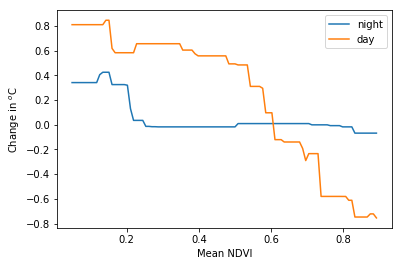

In [269]:
pdp_day = partial_dependence(gbm_day_reg, [4], X=X_train) 
pdp_night = partial_dependence(gbm_night_reg, [4], X=X_train) 
# plt.plot(pdp_day[0], pdp_day[1], pdp_night[0], pdp_night[1])
%matplotlib inline
plt.plot(pdp_night[1][0], pdp_night[0][0], label = 'night')
plt.plot(pdp_day[1][0], pdp_day[0][0], label = 'day')
plt.ylabel('Change in $^o$C')
plt.xlabel('Mean NDVI')
plt.legend(loc='upper right')
plt.show()

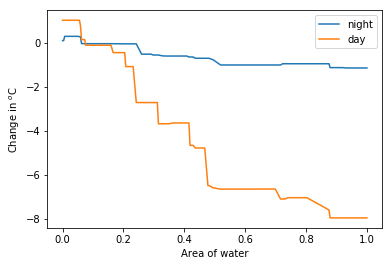

In [270]:
pdp_day = partial_dependence(gbm_day_reg, [7], X=X_train) 
pdp_night = partial_dependence(gbm_night_reg, [7], X=X_train) 
# plt.plot(pdp_day[0], pdp_day[1], pdp_night[0], pdp_night[1])
%matplotlib inline
plt.plot(pdp_night[1][0], pdp_night[0][0], label = 'night')
plt.plot(pdp_day[1][0], pdp_day[0][0], label = 'day')
plt.ylabel('Change in $^o$C')
plt.xlabel('Area of water')
plt.legend(loc='upper right')
plt.show()

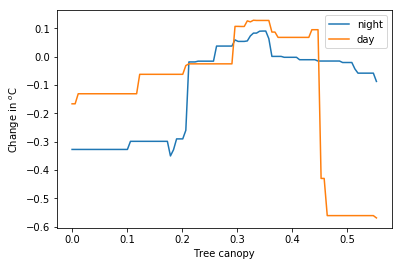

In [271]:
pdp_day = partial_dependence(gbm_day_reg, [20], X=X_train) 
pdp_night = partial_dependence(gbm_night_reg, [20], X=X_train) 
# plt.plot(pdp_day[0], pdp_day[1], pdp_night[0], pdp_night[1])
%matplotlib inline
plt.plot(pdp_night[1][0], pdp_night[0][0], label = 'night')
plt.plot(pdp_day[1][0], pdp_day[0][0], label = 'day')
plt.ylabel('Change in $^o$C')
plt.xlabel('Tree canopy')
plt.legend(loc='upper right')
plt.show()

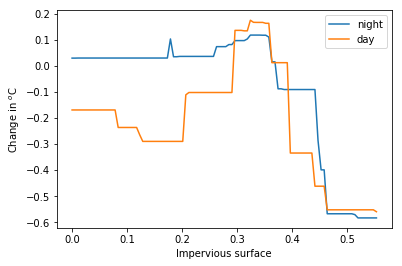

In [272]:
pdp_day = partial_dependence(gbm_day_reg, [23], X=X_train) 
pdp_night = partial_dependence(gbm_night_reg, [23], X=X_train) 
# plt.plot(pdp_day[0], pdp_day[1], pdp_night[0], pdp_night[1])
%matplotlib inline
plt.plot(pdp_night[1][0], pdp_night[0][0], label = 'night')
plt.plot(pdp_day[1][0], pdp_day[0][0], label = 'day')
plt.ylabel('Change in $^o$C')
plt.xlabel('Impervious surface')
plt.legend(loc='upper right')
plt.show()